In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [40]:
# Importing more libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from keras.optimizers import Adam

Loading and preparing the data

In [5]:
# Reading the dataset
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
train_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
test_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [7]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [8]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [10]:
train_df['Train'] = 1
test_df['Train'] = 0

In [11]:
# Merging the data
combined_df = pd.concat([train_df, test_df], axis=0)
combined_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Train
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,1
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0,1
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0,1
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0,1
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0,1
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0,1


In [12]:
# Droping NaN values
combined = combined_df.dropna(axis=1)
combined.head(10)

,Id,MSSubClass,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleCondition,Train
0,1,60,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,61,0,0,0,0,0,2,2008,Normal,1
1,2,20,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,0,5,2007,Normal,1
2,3,60,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,42,0,0,0,0,0,9,2008,Normal,1
3,4,70,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,35,272,0,0,0,0,2,2006,Abnorml,1
4,5,60,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,84,0,0,0,0,0,12,2008,Normal,1
5,6,50,14115,Pave,IR1,Lvl,Inside,Gtl,Mitchel,Norm,...,30,0,320,0,0,700,10,2009,Normal,1
6,7,20,10084,Pave,Reg,Lvl,Inside,Gtl,Somerst,Norm,...,57,0,0,0,0,0,8,2007,Normal,1
7,8,60,10382,Pave,IR1,Lvl,Corner,Gtl,NWAmes,PosN,...,204,228,0,0,0,350,11,2009,Normal,1
8,9,50,6120,Pave,Reg,Lvl,Inside,Gtl,OldTown,Artery,...,0,205,0,0,0,0,4,2008,Abnorml,1
9,10,190,7420,Pave,Reg,Lvl,Corner,Gtl,BrkSide,Artery,...,4,0,0,0,0,0,1,2008,Normal,1


In [13]:
combined.shape

(2919, 47)

In [14]:
# Dropping id column, because it doesn't contain valuable information
combinednew = combined.drop('Id', axis=1)
combinednew.shape

(2919, 46)

In [15]:
combineddum = pd.get_dummies(combinednew)
combineddum.shape

(2919, 150)

In [16]:
# separating data back into train and test parts
mytrain = combineddum[combineddum['Train'] == 1]
mytest = combineddum[combineddum['Train'] == 0]
mytrain = mytrain.drop('Train', axis=1)
mytest = mytest.drop('Train', axis=1)
mytrain.shape, mytest.shape

((1460, 149), (1459, 149))

In [17]:
x = mytrain
y = train_df['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_test2 = mytest
x_train.shape, y_train.shape, x_test.shape, y_test.shape, x_test2.shape

((1095, 149), (1095,), (365, 149), (365,), (1459, 149))

Trying linaear regression first

In [18]:
linregr = Ridge(alpha=0.01)
linregr.fit(x_train, y_train)

Ridge(alpha=0.01)

In [19]:
mean_squared_error(y_test, linregr.predict(x_test), squared=False)

35297.7140313619

In [20]:
r2_score(y_test, linregr.predict(x_test))

0.8226552723378772

In [21]:
linregr.predict(x_test2)

array([112377.0718015 , 160698.84567943, 171849.25937053, ...,
       148984.13866412, 140093.82131757, 227094.02721352])

Trying Gradient Boosting Regressor

In [22]:
gradregr = GradientBoostingRegressor(random_state=0)
gradregr.fit(x_train, y_train)

GradientBoostingRegressor(random_state=0)

In [23]:
mean_squared_error(y_test, gradregr.predict(x_test), squared=False)

26456.69095028019

In [24]:
r2_score(y_test, gradregr.predict(x_test))

0.9003686145520984

Trying random forest regressor

In [25]:
regrforest = RandomForestRegressor()
regrforest.fit(x_train, y_train)

RandomForestRegressor()

In [26]:
mean_squared_error(y_test, regrforest.predict(x_test), squared=False)

30270.607137238494

In [27]:
r2_score(y_test, regrforest.predict(x_test))

0.8695730361975729

Trying neural network

In [74]:
model = tf.keras.Sequential()
# model.add(keras.layers.Dense(128, activation="relu", input_dim=149))
# model.add(keras.layers.Dense(64, activation="relu"))
# model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(1, activation="linear"))

In [75]:
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=1e-3, decay=1e-3 / 200))

In [78]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1500, batch_size=1095, verbose=0)


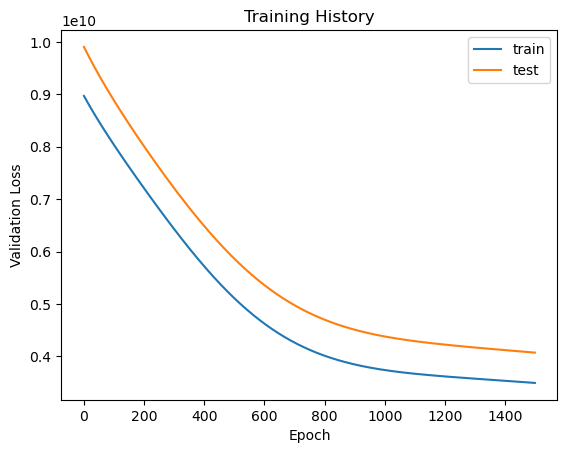

In [79]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.title('Training History'),
plt.xlabel('Epoch'),
plt.ylabel('Validation Loss')
plt.show()

In [31]:
yhat = gradregr.predict(x_test2)
x_test2["SalePrice"] = yhat

In [34]:
submission["SalePrice"] = yhat
submission.head()

,Id,SalePrice
0,1461,126954.272516
1,1462,156882.537646
2,1463,176141.966477
3,1464,189339.058048
4,1465,203170.041591


In [73]:
submission.to_csv("submission.csv", index = False)